In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score


In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv("data/men_shoes.csv", low_memory=False)

In [6]:
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [9]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin'] 
y_pred = [mean_price] * y_true.shape[0]


In [12]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

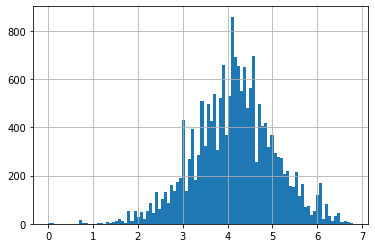

In [13]:
np.log1p( df['prices_amountmin'] ).hist(bins=100)

In [15]:
y_true = df['prices_amountmin'] 
y_pred = [ np.median( y_true  ) ] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [16]:
y_true = df['prices_amountmin'] 
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [ price_log_mean ] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [27]:
feats = ['brand_cat']

def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

run_model(feats)

(-58.38655694633361, 4.223555478221712)

In [29]:
run_model( ['brand_cat', 'manufacturer_cat'] )

(-58.53930419908596, 4.311223231615436)

In [30]:
run_model( ['manufacturer_cat'] )

(-63.133649278023746, 3.394307434888982)